In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


In [2]:
df = pd.read_csv("/kaggle/input/nyc-taxi-trip-duration/train.zip")
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Data fields

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory 
before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

In [3]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [4]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [5]:
len(df[df.passenger_count == 0])

60

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Outliers visualization'}>

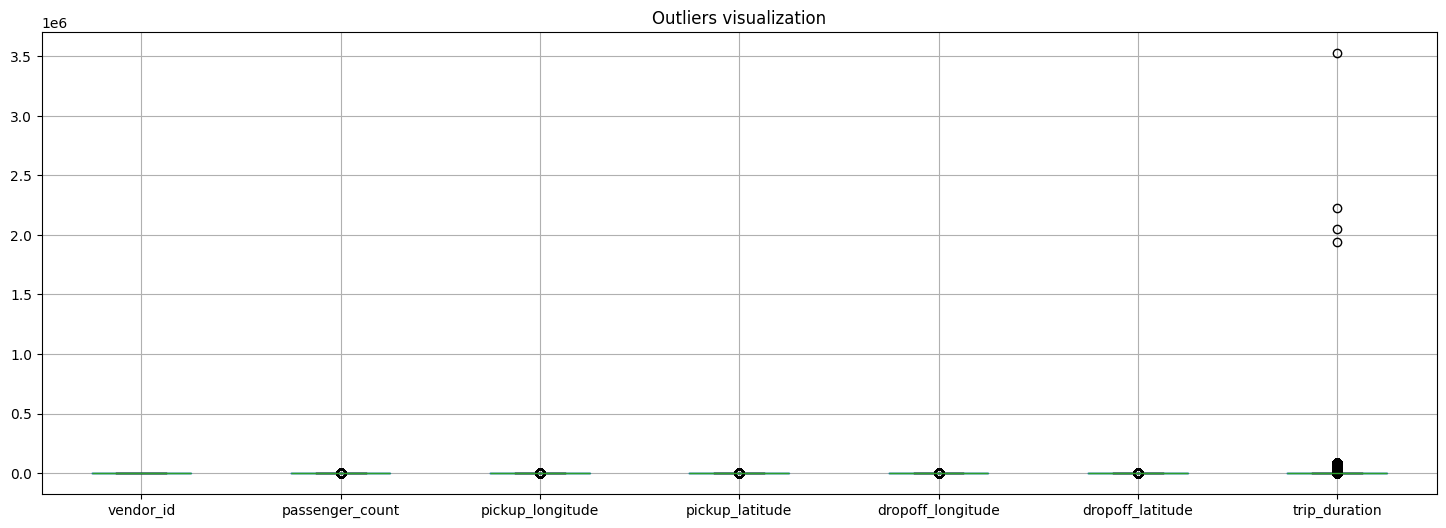

In [7]:
plt.subplots(figsize=(18,6))
plt.title("Outliers visualization")
df.boxplot()

In [8]:
df = df[(df.trip_duration < 6000) & (df.passenger_count > 0)]

<Axes: title={'center': 'Outliers visualization'}>

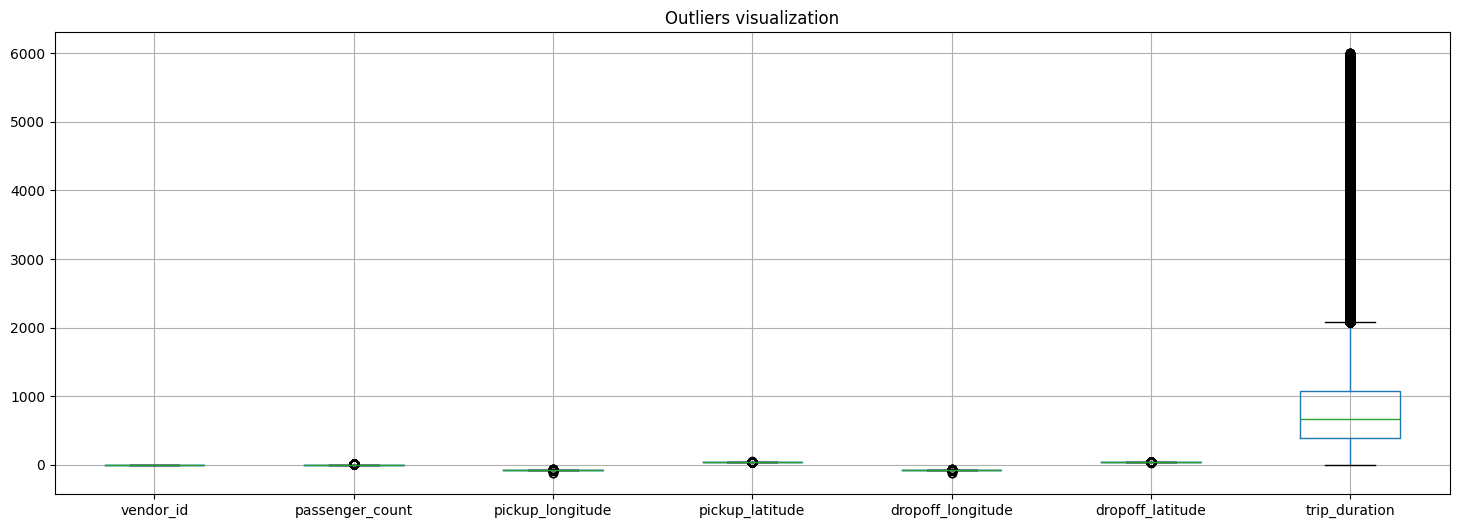

In [9]:
plt.subplots(figsize=(18,6))
plt.title("Outliers visualization")
df.boxplot()

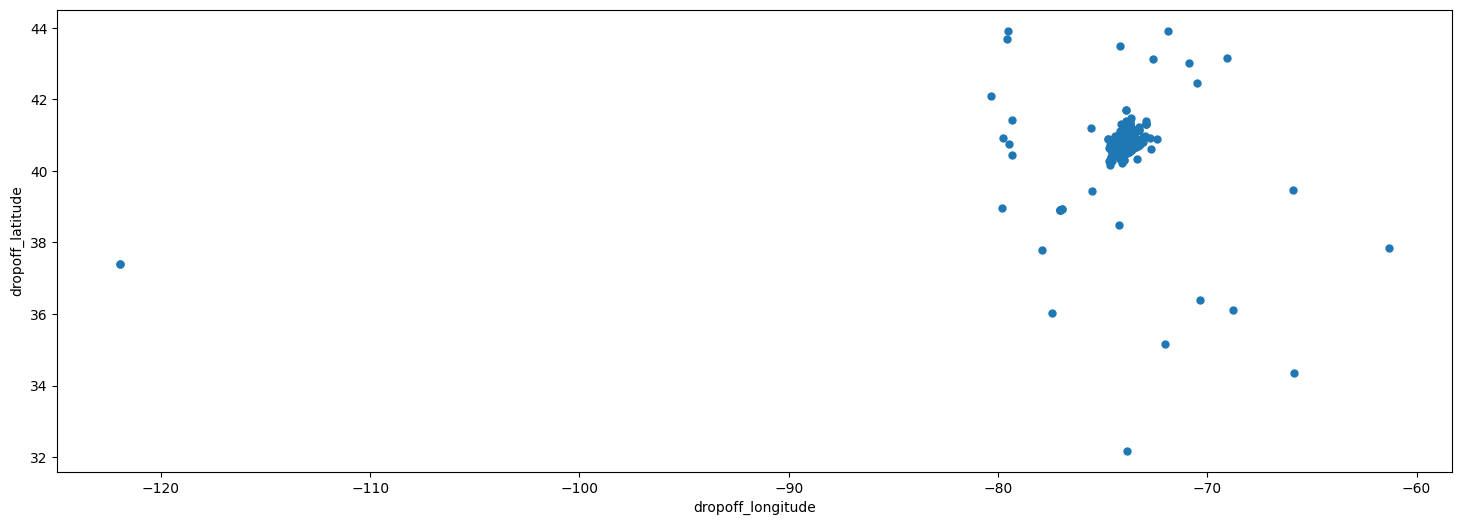

In [10]:
dropoff_longitude = list(df.dropoff_longitude)
dropoff_latitude = list(df.dropoff_latitude)
plt.subplots(figsize=(18,6))
plt.plot(dropoff_longitude, dropoff_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.show()

In [11]:
df = df[(df.pickup_longitude > -100) & (df.pickup_latitude < 50)]

In [12]:
df = pd.concat([df, pd.get_dummies(df['store_and_fwd_flag'])], axis=1)

df.drop(['store_and_fwd_flag'], axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['vendor_id'])], axis=1)

df.drop(['vendor_id'], axis=1, inplace=True)

In [13]:
df.head(10)

,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,N,Y,1,2
0,id2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,True,False,False,True
1,id2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,True,False,True,False
2,id3858529,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,True,False,False,True
3,id3504673,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,True,False,False,True
4,id2181028,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,True,False,False,True
5,id0801584,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,443,True,False,False,True
6,id1813257,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,341,True,False,True,False
7,id1324603,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,1551,True,False,False,True
8,id1301050,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,255,True,False,True,False
9,id0012891,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,1225,True,False,False,True


In [14]:
df.drop(['dropoff_datetime'], axis=1, inplace=True)

In [15]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)

df['month'] = df.pickup_datetime.dt.month
df['week'] = df.pickup_datetime.dt.isocalendar().week
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour
df['minute'] = df.pickup_datetime.dt.minute
df['minute_oftheday'] = df['hour'] * 60 + df['minute']
df.drop(['minute'], axis=1, inplace=True)

In [16]:
df.drop(['pickup_datetime'], axis=1, inplace=True)

In [17]:
#Function aiming at calculating distances from coordinates
def ft_haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

#Add distance feature
df['distance'] = ft_haversine_distance(df['pickup_latitude'].values,
                                                 df['pickup_longitude'].values, 
                                                 df['dropoff_latitude'].values,
                                                 df['dropoff_longitude'].values)

In [18]:
#Function aiming at calculating the direction
def ft_degree(lat1, lng1, lat2, lng2):
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

#Add direction feature
df['direction'] = ft_degree(df['pickup_latitude'].values,
                                df['pickup_longitude'].values,
                                df['dropoff_latitude'].values,
                                df['dropoff_longitude'].values)

<Axes: >

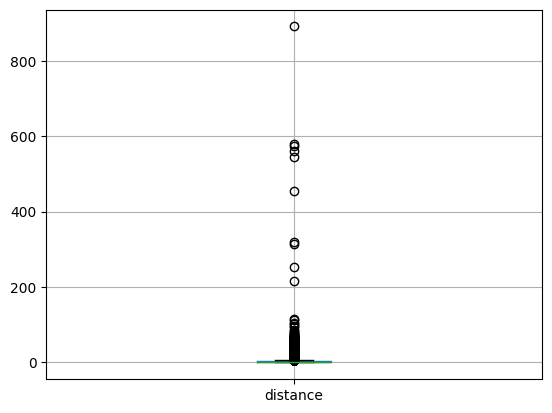

In [19]:
df.boxplot(column='distance', return_type='axes')

In [20]:
df = df[(df.distance < 200)]

In [21]:
df['trip_duration'] = np.log1p(df['trip_duration'].values)

In [22]:
df['speed'] = df.distance / df.trip_duration

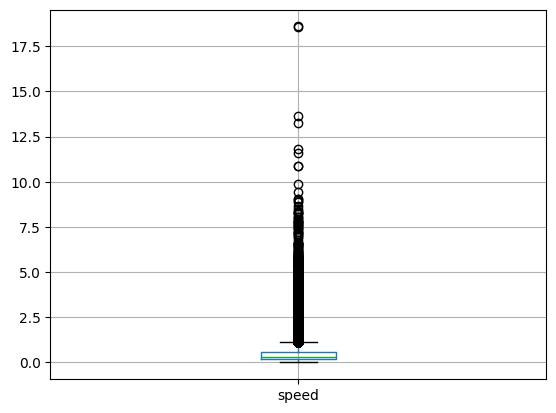

In [23]:
df.boxplot(column='speed', return_type='axes');

In [24]:
y = df["trip_duration"]
df.drop(["trip_duration"], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
X = df

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error as MSE

import optuna
from optuna.samplers import TPESampler

In [45]:
def create_objective(model_name):
    def objective(trial):
        if model_name == "XGBoost":
            params = {
                "n_estimators": trial.suggest_int("n_estimators", 100, 1200),
                "max_depth": trial.suggest_int("max_depth", 2, 12),
                "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.3, log=True),
                "subsample": trial.suggest_float("subsample", 0.5, 1.0),
                "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
                "reg_lambda": trial.suggest_float("reg_lambda", 1e-5, 10.0, log=True),
                "reg_alpha": trial.suggest_float("reg_alpha", 1e-5, 10.0, log=True),
                "min_child_weight": trial.suggest_float("min_child_weight", 0.1, 10.0, log=True),
                "random_state": 42,
                "n_jobs": -1,
                "tree_method": "hist",
                "enable_categorical": False,
            }
            model = XGBRegressor(**params)
        
        elif model_name == "LightGBM":
            params = {
                "n_estimators": trial.suggest_int("n_estimators", 100, 1200),
                "max_depth": trial.suggest_int("max_depth", 2, 12),
                "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.3, log=True),
                "subsample": trial.suggest_float("subsample", 0.5, 1.0),
                "colsample_bytree": trial.suggest_float("colsample_bytree", 0.4, 1.0),
                "reg_lambda": trial.suggest_float("reg_lambda", 1e-5, 20.0, log=True),
                "reg_alpha": trial.suggest_float("reg_alpha", 1e-5, 20.0, log=True),
                "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
                "random_state": 42,
                "n_jobs": -1,
                "verbosity": -1,
                "force_row_wise": True,
            }
            model = LGBMRegressor(**params)
        else:
            params = {
                "iterations": trial.suggest_int("iterations", 100, 1200),
                "depth": trial.suggest_int("depth", 4, 10),
                "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.3, log=True),
                "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 0.1, 10.0, log=True),
                "subsample": trial.suggest_float("subsample", 0.5, 1.0),
                "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.4, 1.0),
                "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
                "random_seed": 42,
                "thread_count": -1,
                "verbose":0
            }
            model = CatBoostRegressor(**params)
    
        kf = KFold(n_splits=2, shuffle=True, random_state=42)
        
        scores = cross_val_score(
            model, 
            X_train, y_train,
            cv=kf,
            scoring="neg_root_mean_squared_error",
            n_jobs=-1
        )
    
        rmse = -np.mean(scores)
        return rmse
    return objective

In [46]:
models = {
    "XGBoost":      XGBRegressor(),
    "CatBoost":     CatBoostRegressor(),
    "LightGBM":     LGBMRegressor()
}

In [47]:
study = optuna.create_study(
    direction='minimize',
    sampler=TPESampler(seed=42)
    )

[I 2026-01-29 01:11:45,255] A new study created in memory with name: no-name-d1732871-1934-433d-885e-f17a5041083d


In [31]:
best_params = {}

In [48]:
for name, base_model in models.items():
    print(f"{name}")
    study.optimize(create_objective(name), 
                   n_trials=8, 
                   n_jobs=-1, 
                   show_progress_bar=True, 
                   )

    best_params[name] = [study.best_value, study.best_params]
    print(f"MSE {name}: {study.best_value:.4f}")

XGBoost


  0%|          | 0/8 [00:00<?, ?it/s]

[I 2026-01-29 01:12:15,078] Trial 0 finished with value: 0.18255260353115627 and parameters: {'n_estimators': 129, 'max_depth': 9, 'learning_rate': 0.19487950718222213, 'subsample': 0.9161336369299484, 'colsample_bytree': 0.9008384726933891, 'reg_lambda': 0.005182449422731912, 'reg_alpha': 1.4819943644825195, 'min_child_weight': 0.34714147093980985}. Best is trial 0 with value: 0.18255260353115627.
[I 2026-01-29 01:14:21,999] Trial 2 finished with value: 0.17979085454832763 and parameters: {'n_estimators': 430, 'max_depth': 12, 'learning_rate': 0.05402312783375129, 'subsample': 0.9017728392842779, 'colsample_bytree': 0.7728227222041226, 'reg_lambda': 0.0038363685541247514, 'reg_alpha': 3.963210668802833, 'min_child_weight': 0.5224491544322849}. Best is trial 2 with value: 0.17979085454832763.
[I 2026-01-29 01:16:12,178] Trial 1 finished with value: 0.1811304664218353 and parameters: {'n_estimators': 1026, 'max_depth': 11, 'learning_rate': 0.07290836356959723, 'subsample': 0.85564553793

  0%|          | 0/8 [00:00<?, ?it/s]

[I 2026-01-29 01:20:00,902] Trial 8 finished with value: 0.1900361078917041 and parameters: {'iterations': 400, 'depth': 8, 'learning_rate': 0.10061272848154562, 'l2_leaf_reg': 0.10610527108276052, 'subsample': 0.559420417328407, 'colsample_bylevel': 0.9970433376332335, 'min_data_in_leaf': 88}. Best is trial 2 with value: 0.17979085454832763.
[I 2026-01-29 01:20:53,555] Trial 9 finished with value: 0.18015710288468784 and parameters: {'iterations': 1031, 'depth': 4, 'learning_rate': 0.25075787635693714, 'l2_leaf_reg': 0.2038049159797344, 'subsample': 0.5830917442687056, 'colsample_bylevel': 0.406698934662059, 'min_data_in_leaf': 65}. Best is trial 2 with value: 0.17979085454832763.
[I 2026-01-29 01:22:16,920] Trial 11 finished with value: 0.18342324743966343 and parameters: {'iterations': 242, 'depth': 10, 'learning_rate': 0.2377849473006969, 'l2_leaf_reg': 1.1689766004137705, 'subsample': 0.7370910501124484, 'colsample_bylevel': 0.5927140376498375, 'min_data_in_leaf': 23}. Best is tri

  0%|          | 0/8 [00:00<?, ?it/s]

[W 2026-01-29 01:41:02,005] Trial 16 failed with parameters: {'n_estimators': 990, 'max_depth': 6, 'learning_rate': 0.05581307662295903, 'subsample': 0.8079664036458977, 'colsample_bytree': 0.4035524711588023, 'reg_lambda': 17.93839666888541, 'reg_alpha': 1.2433289554766895e-05, 'min_child_samples': 27} because of the following error: KeyboardInterrupt().
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py", line 490, in _process_worker
    r = call_item()
        ^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py", line 291, in __call__
    return self.fn(*self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/joblib/parallel.py", line 607, in __call__
    return [func(*args, **kwargs) for func, args, kwargs in self.items]
            ^^^

KeyboardInterrupt: 

[I 2026-01-29 01:14:21,999] Trial 2 finished with value: 0.17979085454832763 and parameters: {'n_estimators': 430, 'max_depth': 12, 'learning_rate': 0.05402312783375129, 'subsample': 0.9017728392842779, 'colsample_bytree': 0.7728227222041226, 'reg_lambda': 0.0038363685541247514, 'reg_alpha': 3.963210668802833, 'min_child_weight': 0.5224491544322849}. Best is trial 2 with value: 0.17979085454832763.

In [51]:
best_params = {'n_estimators': 430,
                'max_depth': 12,
                'learning_rate': 0.05402312783375129,
                'subsample': 0.9017728392842779,
                'colsample_bytree': 0.7728227222041226,
                'reg_lambda': 0.0038363685541247514, 
                'reg_alpha': 3.963210668802833,
                'min_child_weight': 0.5224491544322849}
model = XGBRegressor(**best_params)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [53]:
MSE(y_test, pred)

0.029850501933010348

In [58]:
pred = np.expm1(pred)
y_test_exp = np.expm1(y_test)

In [66]:
loss_in_sec = MSE(y_test_exp, pred)**0.5
loss_in_sec

123.81634180500568

In [67]:
loss_in_sec/60

2.0636056967500944

In [68]:
model.save_model("model.ubj")